# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
  numerator = true_positive_rate * prob_drunk_prior
  pos_val = (numerator) / (false_positive_rate)
  return pos_val
prob_drunk_given_positive(.001, .08, 1)

0.0125

In [0]:
# Ran this test three times for this result.
prob_drunk_given_positive(0.15625, .08, 1)

1.953125

# 2 - Plot

In [0]:
# Import statements
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

In [0]:
# Load the voting data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-05-27 01:13:49--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-05-27 01:13:49 (279 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
# Defining the column headers for the data file.

column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

In [0]:
# Create the DataFrame
votes_df = pd.read_csv('house-votes-84.data',
                       header=None,
                       names=column_headers,
                       na_values="?")

In [0]:
# Changing the vote values to 1s and 0s. Recoding the values.
votes_df = votes_df.replace({'y':1, 'n':0})

In [0]:
# Assigning the valriables to the rep and dem columns for processing.

reps = votes_df[votes_df['party'] == 'republican']
dems = votes_df[votes_df['party'] == 'democrat']

In [0]:
# ttest for this vote using the frequentist testing approach.
from scipy.stats import ttest_ind
stat_lst = list(ttest_ind(reps['physician-fee-freeze'], 
          dems['physician-fee-freeze'],
          nan_policy='omit'))
stat_lst

[49.36708157301406, 1.994262314074344e-177]

In [0]:
# Cleaning the NaN values for the Basian testing
col_r = reps['physician-fee-freeze']
col_d = dems['physician-fee-freeze']

# First reps col
np.isnan(col_r)
r_col = col_r[~np.isnan(col_r)]

# Next dems col
np.isnan(col_d)
d_col = col_d[~np.isnan(col_d)]

In [0]:
# MAking a list to better define the upcoming DataFrame construction.
plst = [stat_lst[0], basian_vt]

In [0]:
# Forming the data into a dataframe.
freq_bas = pd.DataFrame(plst, index=['Frequentist', 'Basian'], columns=['Values'])
freq_bas

,Values
Frequentist,49.367082
Basian,50.000000


In [0]:
# Function to get the confidence interval from a data set.

from scipy import stats
def con_int(dt, confidence=0.95):
    """
    Calculate a confidence interval around a sample mean for given data.
    Using t-distribution and two-tailed test, default 95% confidence. 

    Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval

    Returns:
    tuple of (mean, lower bound, upper bound)
    """
    newdata = np.array(dt)
    newmean = np.mean(dt)
    n=len(dt)
    std_err = np.std(dt, ddof=1)/np.sqrt(n)
    margin_err = std_err*stats.t.ppf((1 + confidence)/2, n-1)
    return (newmean, newmean - margin_err, newmean + margin_err)

In [0]:
# Getting the Confidence Interval for the frequentist/basian table.
con_int_CI = con_int(freq_bas['Values'])
con_int_CI

(49.68354078650703, 45.66254522913509, 53.70453634387897)

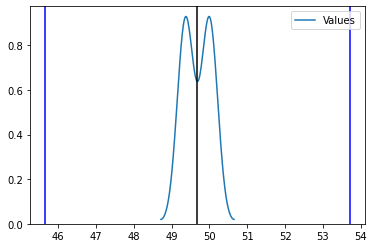

In [0]:
# Plot of the Frequentist and Basian proabbility appraoch.
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(freq_bas['Values'])
plt.axvline(x=con_int_CI[1], color='blue');
plt.axvline(x=con_int_CI[2], color='blue');
plt.axvline(x=con_int_CI[0], color='black');

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!